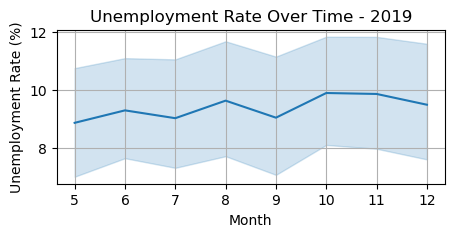

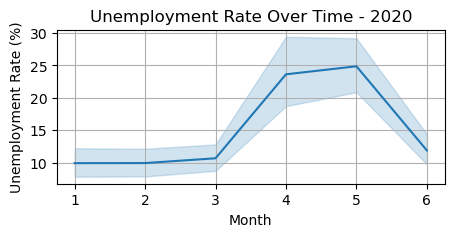

In [67]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')

# Remove rows where all columns are empty
df = df.dropna(how='all')

# Strip leading and trailing spaces from the ' Date' column
df[' Date'] = df[' Date'].str.strip()

# Convert ' Date' column to datetime with the correct date format
df[' Date'] = pd.to_datetime(df[' Date'], format='%d-%m-%Y')

# Extract the year and month from the ' Date' column
df['year'] = df[' Date'].dt.year
df['month'] = df[' Date'].dt.month

# Group by year and plot for each year
years = df['year'].unique()

for year in years:
    plt.figure(figsize=(5, 2))
    data_year = df[df['year'] == year]
    sns.lineplot(x='month', y=' Estimated Unemployment Rate (%)', data=data_year)
    
    plt.title(f'Unemployment Rate Over Time - {year}')
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()


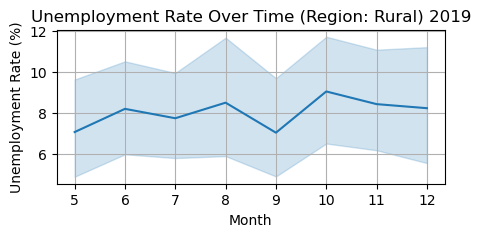

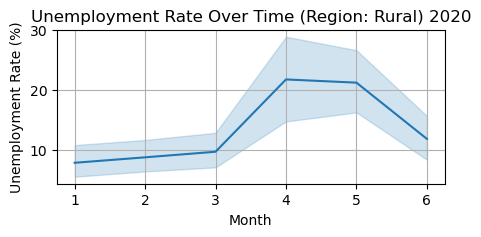

In [42]:
condition = df['Area'] == 'Rural'  # Change 'Region' and 'ABC' to your specific condition

# Filter the DataFrame based on the condition
df_filtered = df[condition]


for year in years:
    plt.figure(figsize=(5, 2))
    data_year = df_filtered[df_filtered['year'] == year]
    sns.lineplot(x='month', y=' Estimated Unemployment Rate (%)', data=data_year)
    
    plt.title(f'Unemployment Rate Over Time (Region: Rural) {year}')
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()

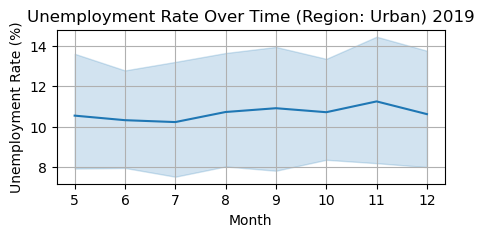

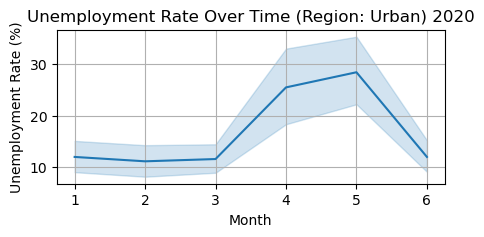

In [41]:
condition = df['Area'] == 'Urban'  # Change 'Region' and 'ABC' to your specific condition

# Filter the DataFrame based on the condition
df_filtered = df[condition]


for year in years:
    plt.figure(figsize=(5, 2))
    data_year = df_filtered[df_filtered['year'] == year]
    sns.lineplot(x='month', y=' Estimated Unemployment Rate (%)', data=data_year)
    
    plt.title(f'Unemployment Rate Over Time (Region: Urban) {year}')
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()

In [32]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'year', 'month'],
      dtype='object')

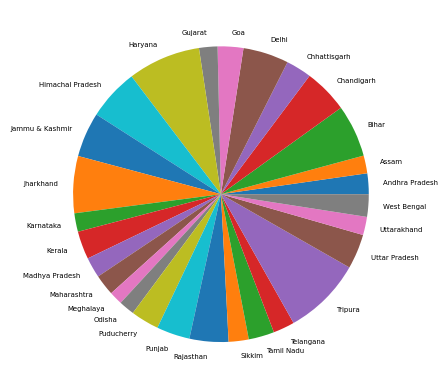

In [71]:
q = df[' Estimated Unemployment Rate (%)']
Region = df['Region']
agg_df = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

# Plot the pie chart using the aggregated data
plt.pie(agg_df.values, labels=agg_df.index)
plt.rcParams['font.size'] = 4

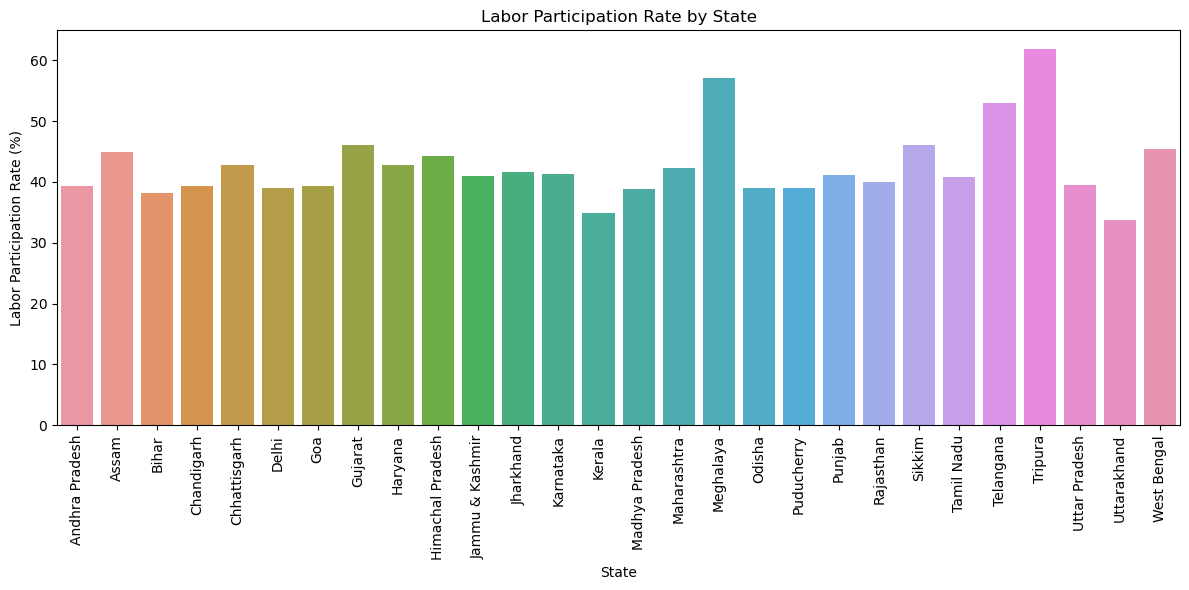

In [53]:
state_labour_participation = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().reset_index()

# Plot bar graph for labor participation rate for each state
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=state_labour_participation)

plt.title('Labor Participation Rate by State')
plt.xlabel('State')
plt.ylabel('Labor Participation Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

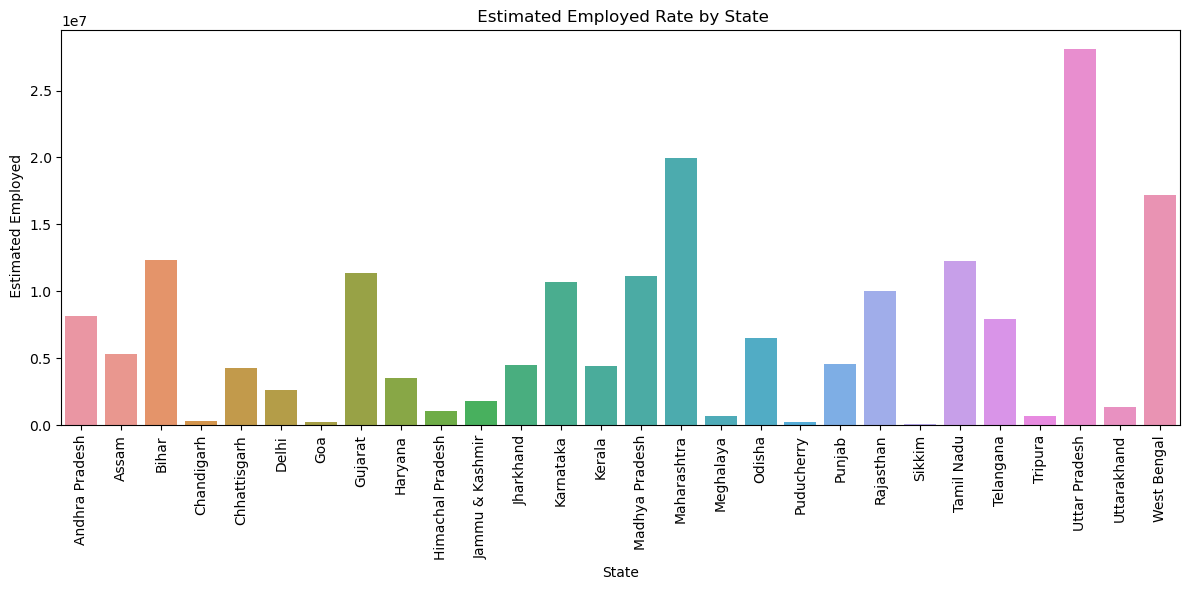

In [56]:
employment = df.groupby('Region')[' Estimated Employed'].mean().reset_index()

# Plot bar graph for labor participation rate for each state
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Employed', data=employment)

plt.title(' Estimated Employed Rate by State')
plt.xlabel('State')
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

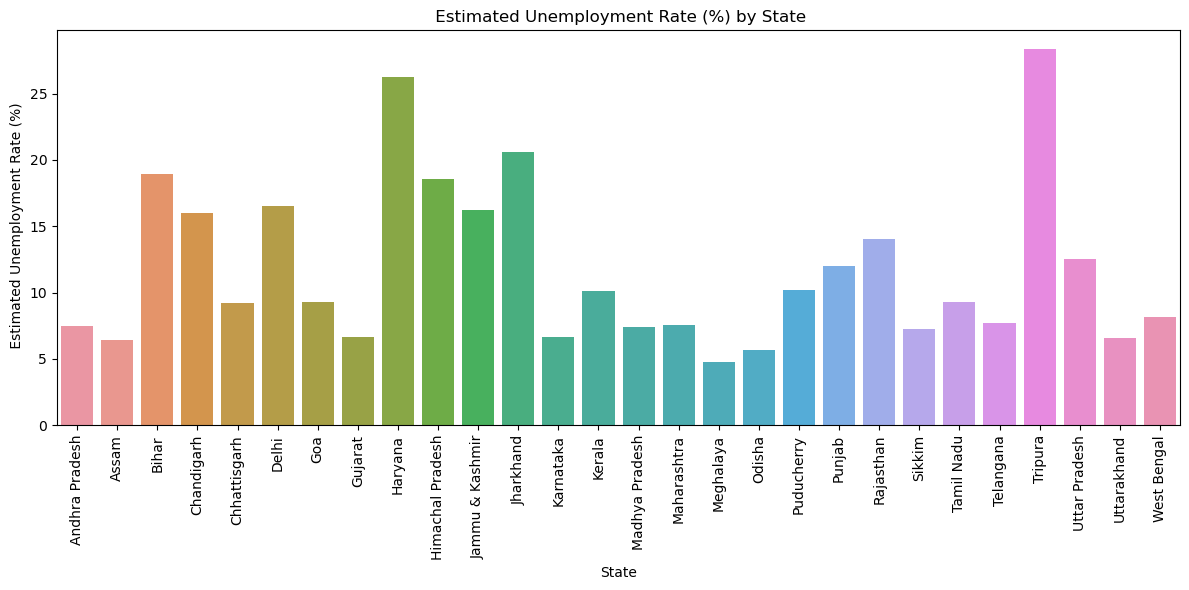

In [66]:
unemployment= df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot bar graph for unemployment rate for each state
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=unemployment)

plt.title(' Estimated Unemployment Rate (%) by State')
plt.xlabel('State')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [64]:
state_avg_unemployment = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

# Find the state with the highest average unemployment rate
state_with_highest_avg_unemployment = state_avg_unemployment.idxmax()
highest_avg_unemployment = state_avg_unemployment.max()
print("State with the highest average unemployment rate:", state_with_highest_avg_unemployment)
print("Highest average unemployment rate:", highest_avg_unemployment)

State with the highest average unemployment rate: Tripura
Highest average unemployment rate: 28.350357142857142


In [65]:
state_avg_unemployment = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

#To Find the state with the lowest average unemployment rate
state_lowest_avg_unemployment = state_avg_unemployment.idxmin()
lowest_avg_unemployment = state_avg_unemployment.min()
print("State with the highest average unemployment rate:", state_lowest_avg_unemployment)
print("Highest average unemployment rate:", lowest_avg_unemployment)

State with the highest average unemployment rate: Meghalaya
Highest average unemployment rate: 4.7988888888888885


In [76]:
state_name = 'Andhra Pradesh'
state_data = df[df['Region'] == state_name]

# Find the month with the highest unemployment rate
highest_unemployment_month = state_data.loc[state_data[' Estimated Unemployment Rate (%)'].idxmax(), 'month']

print("Month with the highest unemployment rate in", state_name, ": month", highest_unemployment_month)

Month with the highest unemployment rate in Andhra Pradesh : month 4


In [77]:
state_name = 'Andhra Pradesh'
state_data = df[df['Region'] == state_name]

# Find the month with the lowest unemployment rate
highest_unemployment_month = state_data.loc[state_data[' Estimated Unemployment Rate (%)'].idxmin(), 'month']

print("Month with the lowest unemployment rate in", state_name, ": month", highest_unemployment_month)

Month with the lowest unemployment rate in Andhra Pradesh : month 6
